### Improving Employee Retention by Predicting Employee Attrition Using Machine Learning
<i>by: Lutfia Husna K</i>

HR Dashboard : [link](https://public.tableau.com/views/HRDashboard_16890846361810/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

### Library and Data Import

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [106]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

Dataset memiliki 287 record data dan 25 kolom data.

### Data Cleansing & Preparation

**Missing Value Handling**

In [108]:
# Checking Missing Data
missing_value = df.isnull().sum().reset_index()
missing_value = missing_value[missing_value[0] > 0]
missing_value['percentation'] = (missing_value[0]/len(df)).round(2)
missing_value = missing_value.sort_values('percentation', ascending = False)
missing_value

,index,0,percentation
19,IkutProgramLOP,258,0.90
20,AlasanResign,66,0.23
11,SkorKepuasanPegawai,5,0.02
14,JumlahKetidakhadiran,6,0.02
12,JumlahKeikutsertaanProjek,3,0.01
13,JumlahKeterlambatanSebulanTerakhir,1,0.00


Karena kolom IkutProgramLOP memiliki missing value sebesar 90%, sehingga kita tidak akan menggunakan kolom ini karena kurang memberikan informasi karena banyak data hilang.

In [109]:
df = df.drop('IkutProgramLOP', axis = 1)

Untuk kolom Alasan Resign, kita perlu untuk melihat apakah records data dengan AlasanResign kosong merupakan karyawan yang telah resign atau bukan.

In [110]:
# Checking AlasanResign Column
df[df['AlasanResign'].isnull() == True][['TanggalResign', 'AlasanResign']]

,TanggalResign,AlasanResign
105,-,NaN
187,-,NaN
189,-,NaN
190,-,NaN
195,-,NaN
...,...,...
279,-,NaN
280,-,NaN
281,-,NaN
282,-,NaN


In [111]:
# Checking missing value of the AlasanResign column
# Apakah ada Karyawan yang masih bekerja dan kolom 'AlasanResign' kosong?
print('Karyawan yang masih bekerja dengan kolom AlasanResign kosong :',len(df[(df['AlasanResign'].isnull()) & (df['TanggalResign'] == '-')]))
print('Karyawan yang telah resign dengan kolom AlasanResign kosong :',len(df[(df['AlasanResign'].isnull()) & (df['TanggalResign'] != '-')]))

Karyawan yang masih bekerja dengan kolom AlasanResign kosong : 66
Karyawan yang telah resign dengan kolom AlasanResign kosong : 0


Kolom AlasanResign yang memiliki data kosong merupakan record data dari karyawan yang masih bekerja, sehingga akan kita imputasi dengan keterangan 'masih bekerja'

In [112]:
# Imputate AlasanResign 
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')
# Checking Missing Data
missing_value = df.isnull().sum().reset_index()
missing_value = missing_value[missing_value[0] > 0]
missing_value['percentation'] = (missing_value[0]/len(df)).round(2)
missing_value = missing_value.sort_values('percentation', ascending = False)
missing_value

,index,0,percentation
11,SkorKepuasanPegawai,5,0.02
14,JumlahKetidakhadiran,6,0.02
12,JumlahKeikutsertaanProjek,3,0.01
13,JumlahKeterlambatanSebulanTerakhir,1,0.00


**Duplicated Value**

In [113]:
df.duplicated().sum()

0

Untuk missing value lain akan kita abaikan terlebih dahulu pada saat melakukan EDA

**Checking incorrect data**

In [114]:
for i in df.select_dtypes('object').columns:
    print(i, 'column : ', set(df[i]))

Username column :  {'enviousPie8', 'brainyGranola0', 'peacefulEggs3', 'jealousGelding2', 'pluckyMuesli3', 'jubilantTeal7', 'giddyCod5', 'finickyDunbird1', 'excludedTeal8', 'brainyBittern0', 'amazedMoth0', 'peskyJaguar5', 'dopeyBass1', 'needfulZebra5', 'joyfulMacaw9', 'crummyPudding5', 'hushedBobolink8', 'excludedPorpoise4', 'shySyrup7', 'madFerret4', 'excludedCoconut6', 'enviousMacaw4', 'forsakenAntelope5', 'pacifiedCow0', 'cockyBuzzard5', 'alertSyrup3', 'trustingLizard8', 'worldlyPaella8', 'dopeyGatorade1', 'chicSalami4', 'anxiousTeal2', 'obsessedCake8', 'curiousMackerel5', 'worldlyCow6', 'crushedRaisins0', 'mellowCheese1', 'pluckyRhino0', 'cruelCaviar1', 'grudgingMeerkat3', 'trustingCrane4', 'cautiousOwl6', 'somberBoars0', 'thrilledThrushe4', 'somberRelish9', 'pluckyHoopoe3', 'giddyMallard9', 'truthfulHawk9', 'exactingZebra6', 'dopeySheep0', 'fondDoughnut4', 'boastfulWasp1', 'somberCod8', 'wornoutCrane2', 'jumpyCaviar5', 'culturedMandrill6', 'jumpyBuck8', 'abjectRuffs3', 'wingedPorpo

Terlihat ada incorrect data pada kolom PernahBekerja dan StatusPernikahan.

In [115]:
df['PernahBekerja'] = df['PernahBekerja'].replace({'yes':'Yes', 1:'No'})
print(set(df['PernahBekerja']))
df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-':'Lainnya'})
print(set(df['StatusPernikahan']))

{'Yes', 'No'}
{'Menikah', 'Bercerai', 'Belum_menikah', 'Lainnya'}


**Create New Column**

**Resign Column**

Selanjutnya, untuk memudahkan kita dalam mengidentifikasi karyawan yang stay atau resign, kita buat kolom baru yaitu Resign.

In [116]:
# Resign status
df['Resign'] = df['TanggalResign'].apply(lambda x: 'No' if x == '-' else 'Yes')
set(df['Resign'])

{'No', 'Yes'}

**Age column**

Selanjutnya, dibuat kolom Age untuk melihat usia karyawan

In [117]:
# Age
from datetime import datetime
now = datetime.now()
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
# Menghitung jarak tahun
df['Age'] = now.year - df['TanggalLahir'].dt.year

### Exploratory Data Analysis

Exploratory Data Analysis dilakukan untuk menggali insight dari data. Hal utama yang ingin kita ketahui adalah bagaimana keadaan karyawan secara keseluruhan, bagaimana karakteristik karyawan yang stay dan resign.

### Analisis Keseluruhan karyawan

**Persentase Karyawan Resign**

In [118]:
label = ['Stay', 'Resign']
resign_stay_plot = px.pie(df, values=df['Resign'].value_counts().values, color=df['Resign'].value_counts().index, names=label, color_discrete_map = {'No':'#4B878B', 'Yes':'#921416'}, hole=0.5, width = 550)
resign_stay_plot.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
resign_stay_plot.update_layout(title="<b>Client Risk Level</b>", title_font=dict(size=16))
resign_stay_plot

Dalam rentang tahun 2006 hingga 2020, terdapat 31% karyawan yang resign.

Selanjutnya kita akan lihat bagaimana data karyawan masuk dan resign tiap tahunnya.

In [119]:
# Create Hiring Year
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TahunHiring'] = df['TanggalHiring'].dt.year

list = []
for index, i in df.iterrows():
    if i['TanggalResign'] == '-':
        list.append('-')
    else:
        list.append(pd.to_datetime(i['TanggalResign']).year)
df['TahunResign'] = list

In [120]:
hiringbyyear = df.groupby('TahunHiring').agg(count = ('EnterpriseID', 'nunique')).reset_index()
resignbyyear = df.groupby('TahunResign').agg(count = ('EnterpriseID', 'nunique')).reset_index()
Reportbyyear = pd.merge(hiringbyyear, resignbyyear, left_on='TahunHiring', right_on = 'TahunResign', how='outer')
Reportbyyear['Tahun'] = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, '-']
Reportbyyear = Reportbyyear[['Tahun', 'count_x', 'count_y']]
Reportbyyear = Reportbyyear.rename({'count_x':'Hiring', 'count_y':'Resign'}, axis = 1)
Reportbyyear[['Hiring', 'Resign']] = Reportbyyear[['Hiring', 'Resign']].fillna(0) 
Reportbyyear = Reportbyyear[Reportbyyear['Tahun'] != '-']
Reportbyyear['TotalKaryawan'] = (Reportbyyear['Hiring'] - Reportbyyear['Resign']).cumsum()
Reportbyyear['ResignRate (%)'] = ((Reportbyyear['Resign']/Reportbyyear['TotalKaryawan'])*100).round(2)
Reportbyyear

,Tahun,Hiring,Resign,TotalKaryawan,ResignRate (%)
0,2006,1.0,0.0,1.0,0.00
1,2007,2.0,0.0,3.0,0.00
2,2008,2.0,0.0,5.0,0.00
3,2009,7.0,0.0,12.0,0.00
4,2010,8.0,0.0,20.0,0.00
5,2011,76.0,0.0,96.0,0.00
6,2012,41.0,0.0,137.0,0.00
7,2013,43.0,5.0,175.0,2.86
8,2014,56.0,12.0,219.0,5.48
9,2015,31.0,8.0,242.0,3.31


In [121]:
totalkaryawan = px.line(Reportbyyear, x = 'Tahun', y = 'TotalKaryawan', text = 'TotalKaryawan', color_discrete_sequence = ['green'], markers = True)
totalkaryawan.update_traces(textposition="top left")
totalkaryawan.update_layout(
    xaxis=dict(
        tickmode='linear'
    )
)
totalkaryawan.update_layout(title="Report Angka Karyawan per Tahun",title_font=dict(size=18, color="black"))

Banyak karyawan terus naik dari tahun 2006, hingga puncaknya pada 2016, hal ini menandakan angka karyawan masuk lebih besar daripada karyawan resign. Dan sejak tahun 2017 terjadi penurunan angka karyawan, dan terus berlanjut hingga tahun 2020.

In [122]:
# Karyawan Masuk dan Resign per tahun
yearlyreport = go.Figure()
yearlyreport.add_scatter(x = Reportbyyear[Reportbyyear['Resign'] > 0]['Tahun'], y = Reportbyyear[Reportbyyear['Resign'] > 0]['Resign'], name = 'Resign', line=dict(color='firebrick'))
yearlyreport.add_scatter(x = Reportbyyear[Reportbyyear['Hiring'] > 0]['Tahun'], y = Reportbyyear[Reportbyyear['Hiring'] > 0]['Hiring'], name = 'Hiring', line=dict(color='royalblue'))
yearlyreport.update_layout(
    xaxis=dict(
        tickmode='linear'), 
    width = 900,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01)
)
yearlyreport.update_layout(title="Report Angka Karyawan Resign dan Masuk",title_font=dict(size=18, color="black"))

Pada tahun 2006 hingga 2012 tidak terdapat karyawan resign, hal ini diakibatkan karena perusahaan baru mulai berdiri.

Pada tahun 2013 baru terdapat karyawan resign sebanyak 5 karyawan, dan kemudian naik pada tahun selanjutnya. Angka karyawan resign meninggi dari tahun 2016, dan angka karyawan resign lebih tinggi daripada karyawan masuk sejak tahun 2017.

Sejak tahun 2019 tidak ada karyawan masuk lagi, dan angka karyawan resign tetap berlanjut hingga tahun 2020.

Untuk lebih mengetahun kembali rasio haryawan resign dan karyawan stay, kita akan melihat trend resign rate perusahaan.

In [123]:
resignrate = px.line(Reportbyyear, x = 'Tahun', y = 'ResignRate (%)', color_discrete_sequence = ['firebrick'], markers = True, text = (Reportbyyear['ResignRate (%)'].astype(str) + '%'))
resignrate.update_traces(textposition="top left")
resignrate.update_layout(
    xaxis=dict(
        tickmode='linear'
    )
)
resignrate.update_layout(title="Resign rate per Tahun (%)",title_font=dict(size=18, color="black"))


Resign rate tertinggi terdapat pada tahun 2014 dan 2018.

Kemudian, kita akan membuat beberapa tabel yang dapat memberikan ringkasan per tahun sesuai kategori

**Profession Yearly Report**

In [124]:
resignbyprofession = df[['Pekerjaan', 'Resign', 'EnterpriseID']]
resignbyprofession = resignbyprofession.groupby(['Pekerjaan', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
resignbyprofession = resignbyprofession.pivot(index='Pekerjaan', columns='Resign', values='count').reset_index().fillna(0)
resignbyprofession = resignbyprofession.rename({'No' : 'Not Resign', 'Yes' : 'Resign'}, axis = 1)
resignbyprofession['Total Karyawan'] = resignbyprofession['Not Resign'] + resignbyprofession['Resign']
resignbyprofession['Resign Rate (%)'] = ((resignbyprofession['Resign']/resignbyprofession['Total Karyawan'])*100).round(2)
resignbyprofession.sort_values('Resign Rate (%)', ascending = False)

Resign,Pekerjaan,Not Resign,Resign,Total Karyawan,Resign Rate (%)
0,Data Analyst,8.0,8.0,16.0,50.00
12,Software Engineer (Front End),44.0,28.0,72.0,38.89
5,Product Design (UI & UX),15.0,9.0,24.0,37.50
7,Product Manager,11.0,6.0,17.0,35.29
1,Data Engineer,7.0,3.0,10.0,30.00
10,Software Engineer (Android),17.0,7.0,24.0,29.17
11,Software Engineer (Back End),81.0,28.0,109.0,25.69
2,DevOps Engineer,3.0,0.0,3.0,0.00
3,Digital Product Manager,2.0,0.0,2.0,0.00
4,Machine Learning Engineer,2.0,0.0,2.0,0.00


**Jenjang Karir Yearly Report**

In [125]:
resignbyjenjangkarir = df[['JenjangKarir', 'Resign', 'EnterpriseID']]
resignbyjenjangkarir = resignbyjenjangkarir.groupby(['JenjangKarir', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
resignbyjenjangkarir = resignbyjenjangkarir.pivot(index='JenjangKarir', columns='Resign', values='count').reset_index().fillna(0)
resignbyjenjangkarir = resignbyjenjangkarir.rename({'No' : 'Not Resign', 'Yes' : 'Resign'}, axis = 1)
resignbyjenjangkarir['Total Karyawan'] = resignbyjenjangkarir['Not Resign'] + resignbyjenjangkarir['Resign']
resignbyjenjangkarir['Resign Rate (%)'] = ((resignbyjenjangkarir['Resign']/resignbyjenjangkarir['Total Karyawan'])*100).round(2)
resignbyjenjangkarir.sort_values('Resign Rate (%)', ascending = False)

Resign,JenjangKarir,Not Resign,Resign,Total Karyawan,Resign Rate (%)
2,Senior_level,32,16,48,33.33
1,Mid_level,47,23,70,32.86
0,Freshgraduate_program,119,50,169,29.59


**Performance Yearly Report**

In [126]:
resignbyperformance = df[['PerformancePegawai', 'Resign', 'EnterpriseID']]
resignbyperformance = resignbyperformance.groupby(['PerformancePegawai', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
resignbyperformance = resignbyperformance.pivot(index='PerformancePegawai', columns='Resign', values='count').reset_index().fillna(0)
resignbyperformance = resignbyperformance.rename({'No' : 'Not Resign', 'Yes' : 'Resign'}, axis = 1)
resignbyperformance['Total Karyawan'] = resignbyperformance['Not Resign'] + resignbyperformance['Resign']
resignbyperformance['Resign Rate (%)'] = ((resignbyperformance['Resign']/resignbyperformance['Total Karyawan'])*100).round(2)
resignbyperformance.sort_values('Resign Rate (%)', ascending = False)

Resign,PerformancePegawai,Not Resign,Resign,Total Karyawan,Resign Rate (%)
3,Sangat_bagus,44,29,73,39.73
4,Sangat_kurang,15,9,24,37.50
1,Biasa,59,26,85,30.59
2,Kurang,23,8,31,25.81
0,Bagus,57,17,74,22.97


**Employee Satisfaction Yearly Report**

In [127]:
resignbyskorkepuasan = df[['SkorKepuasanPegawai', 'Resign', 'EnterpriseID']]
resignbyskorkepuasan = resignbyskorkepuasan.groupby(['SkorKepuasanPegawai', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
resignbyskorkepuasan = resignbyskorkepuasan.pivot(index='SkorKepuasanPegawai', columns='Resign', values='count').reset_index().fillna(0)
resignbyskorkepuasan = resignbyskorkepuasan.rename({'No' : 'Not Resign', 'Yes' : 'Resign'}, axis = 1)
resignbyskorkepuasan['Total Karyawan'] = resignbyskorkepuasan['Not Resign'] + resignbyskorkepuasan['Resign']
resignbyskorkepuasan['Resign Rate (%)'] = ((resignbyskorkepuasan['Resign']/resignbyskorkepuasan['Total Karyawan'])*100).round(2)
resignbyskorkepuasan

Resign,SkorKepuasanPegawai,Not Resign,Resign,Total Karyawan,Resign Rate (%)
0,1.0,1,1,2,50.00
1,2.0,6,2,8,25.00
2,3.0,61,35,96,36.46
3,4.0,62,23,85,27.06
4,5.0,64,27,91,29.67


**Employment Status Yearly Report**

In [128]:
resignbystatuskepegawaian = df[['StatusKepegawaian', 'Resign', 'EnterpriseID']]
resignbystatuskepegawaian = resignbystatuskepegawaian.groupby(['StatusKepegawaian', 'Resign']).agg(count = ('EnterpriseID', 'nunique')).reset_index()
resignbystatuskepegawaian = resignbystatuskepegawaian.pivot(index='StatusKepegawaian', columns='Resign', values='count').reset_index().fillna(0)
resignbystatuskepegawaian = resignbystatuskepegawaian.rename({'No' : 'Not Resign', 'Yes' : 'Resign'}, axis = 1)
resignbystatuskepegawaian['Total Karyawan'] = resignbystatuskepegawaian['Not Resign'] + resignbystatuskepegawaian['Resign']
resignbystatuskepegawaian['Resign Rate (%)'] = ((resignbystatuskepegawaian['Resign']/resignbystatuskepegawaian['Total Karyawan'])*100).round(2)
resignbystatuskepegawaian

Resign,StatusKepegawaian,Not Resign,Resign,Total Karyawan,Resign Rate (%)
0,FullTime,148,69,217,31.80
1,Internship,1,3,4,75.00
2,Outsource,49,17,66,25.76


### Analisis Karakteristik karyawan Resign

In [129]:
# Creating new dataframe for resign employee
dfresign = df[df['Resign'] == 'Yes']

### Analisis Karakteristik karyawan Stay

In [130]:
# Creating new dataframe for stay employee
dfresign = df[df['Resign'] == 'No']

### Data Modeling

Cek terlebih dahulu data yang akan digunakan untuk modeling.

In [131]:
df_model = df.copy()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

**Missing Value Handling**

In [132]:
missing_value = df_model.isnull().sum().reset_index()
missing_value = missing_value[missing_value[0] > 0]
missing_value

,index,0
11,SkorKepuasanPegawai,5
12,JumlahKeikutsertaanProjek,3
13,JumlahKeterlambatanSebulanTerakhir,1
14,JumlahKetidakhadiran,6


Data dengan missing value kemudian akan diimputasi dengan nilai 0, karena dianggap tidak mengisi isian.

In [133]:
df_model[['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']] = df_model[['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']].fillna(0)

Akan dicek kembali banyak missing value yang ada

In [134]:
missing_value = df_model.isnull().sum().reset_index()
missing_value = missing_value[missing_value[0] > 0]
missing_value

,index,0


Sudah tidak ada missing value pada dataset

**Feature Selection and Engineering**

Kemudian akan didrop kolom yang tidak akan digunakan, seperti username, enterprise_id, email, nomorhp, dan TanggalLahir.

In [135]:
df_model = df_model.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalPenilaianKaryawan', 'TahunResign', 'TahunHiring'], axis = 1)

Selanjutnya akan dibuat suatu kolom Lama Bekerja

In [136]:
df_model['TanggalResign'] = df_model['TanggalResign'].replace({'-': datetime.now().date()}) #Replace '-' with today date
df_model['LamaBekerja'] = (pd.to_datetime(df_model['TanggalResign']) - pd.to_datetime(df_model['TanggalHiring'])).dt.days
df_model = df_model.drop(['TanggalHiring', 'TanggalResign'], axis = 1)

In [137]:
for i in df_model.select_dtypes('object').columns:
    print(i, '(', len(set(df_model[i])), '): \n', df_model[i].value_counts(),'\n')

StatusPernikahan ( 4 ): 
 Belum_menikah    132
Menikah           57
Lainnya           51
Bercerai          47
Name: StatusPernikahan, dtype: int64 

JenisKelamin ( 2 ): 
 Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64 

StatusKepegawaian ( 3 ): 
 FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64 

Pekerjaan ( 14 ): 
 Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: Pekerjaan, dtype: int64 

JenjangKarir ( 3 ): 
 Freshgraduate_program    169
Mid_level 

Kita akan menghapus kolom yang memiliki rasio object yang timpang karena dianggap dapat memberikan bias kepada hasil model.

In [138]:
df_model_encode = df_model.drop(['HiringPlatform', 'AsalDaerah', 'AlasanResign'], axis = 1) # Drop unused column

Selanjutnya, kita akan melakukan transformasi kolom bertipe object akan diubah menjadi numerik. Untuk feature dengan lebih dari 2 kategori object akan dikelompokkan terlebih dahulu menjadi 2-3 kategori berdasarkan rasionya kemudian baru akan dilakukan one hot encoding dengan fungsi getdummies, dan feature dengan 2 kategori akan dilakukan one hot encoding secara langsung.

In [139]:
# Grouping 
df_model_encode['StatusPernikahan'] = df_model_encode['StatusPernikahan'].replace({'Bercerai':'Lainnya'}) # Masukkan kelompok bercerai ke dalam kelompok Lainnya
df_model_encode['Pekerjaan'] = df_model_encode['Pekerjaan'].replace({
    'Data Analyst' : 'Others',
    'Data Engineer' : 'Others',
    'DevOps Engineer' : 'Others',
    'Digital Product Manager' : 'Others',
    'Machine Learning Engineer' : 'Others',
    'Product Design (UI & UX)' : 'Others',
    'Product Design (UX Researcher)' : 'Others',
    'Product Manager' : 'Others',
    'Scrum Master' : 'Others',
    'Software Architect' : 'SE',
    'Software Engineer (Android)' : 'SE',
    'Software Engineer (Back End)' : 'SE',
    'Software Engineer (Front End)' : 'SE',
    'Software Engineer (iOS)' : 'SE'
}) # Mengelompokan Software Engineer menjadi kelompok 'SE', dan lainnya menjadi kelompok 'others'


In [140]:
# Melakukan one hot encoding dengan Getdummy
df_model_encode = pd.get_dummies(data = df_model_encode, columns = ['StatusPernikahan', 'Pekerjaan', 'StatusKepegawaian', 'JenjangKarir', 'TingkatPendidikan'])
df_model_encode.head()

,JenisKelamin,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,PernahBekerja,Resign,Age,...,Pekerjaan_SE,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level,TingkatPendidikan_Doktor,TingkatPendidikan_Magister,TingkatPendidikan_Sarjana
0,Pria,Sangat_bagus,4,4.0,0.0,0.0,9.0,No,No,51,...,1,0,0,1,1,0,0,0,1,0
1,Pria,Sangat_kurang,4,4.0,4.0,0.0,3.0,No,Yes,39,...,0,1,0,0,1,0,0,0,0,1
2,Pria,Bagus,4,3.0,0.0,0.0,11.0,No,Yes,49,...,1,1,0,0,1,0,0,0,1,0
3,Pria,Bagus,3,3.0,0.0,4.0,6.0,No,No,44,...,1,0,0,1,1,0,0,0,0,1
4,Wanita,Bagus,3,3.0,0.0,0.0,11.0,No,Yes,49,...,0,1,0,0,1,0,0,0,0,1


In [141]:
# Encoding
df_model_encode['JenisKelamin'] = df_model_encode['JenisKelamin'].replace({'Wanita':0, 'Pria':1})
df_model_encode['PernahBekerja'] = df_model_encode['PernahBekerja'].replace({'No':0, 'Yes':1})
df_model_encode['Resign'] = df_model_encode['Resign'].replace({'No':0, 'Yes':1})
# melakukan label encoding pada Performance pegawai karena memiliki urutan
df_model_encode['PerformancePegawai'] = df_model_encode['PerformancePegawai'].replace({'Sangat_kurang' :0, 'Kurang':1, 'Biasa':2, 'Bagus':3, 'Sangat_bagus':4})

In [142]:
df_model_encode.head()

,JenisKelamin,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,PernahBekerja,Resign,Age,...,Pekerjaan_SE,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level,TingkatPendidikan_Doktor,TingkatPendidikan_Magister,TingkatPendidikan_Sarjana
0,1,4,4,4.0,0.0,0.0,9.0,0,0,51,...,1,0,0,1,1,0,0,0,1,0
1,1,0,4,4.0,4.0,0.0,3.0,0,1,39,...,0,1,0,0,1,0,0,0,0,1
2,1,3,4,3.0,0.0,0.0,11.0,0,1,49,...,1,1,0,0,1,0,0,0,1,0
3,1,3,3,3.0,0.0,4.0,6.0,0,0,44,...,1,0,0,1,1,0,0,0,0,1
4,0,3,3,3.0,0.0,0.0,11.0,0,1,49,...,0,1,0,0,1,0,0,0,0,1


**Data Splitting**

Selanjutnya akan dilakukan data splitting sebelum melakukan data preparation lebih lanjut, hal ini bertujuan karena data preparation yang akan kita lakukan selanjutnya meliputi outlier handling yang hanya akan dikenakan pada data train. Hal ini bertujuan untuk menghilangkan outlier pada data train agar tidak terjadi bias pada proses training model. Data test tidak perlu dikenakan outlier handling untuk menjaga keberagaman data pada saat data testing untuk melihat apakah model dapat memprediksi data yang beragam.

Data splitting akan dilakukan dengan membagi data menjadi 80% data train dan 20% data testing.

In [143]:
#Data preparation
#Splitting data train to features and target dataframe
Feature = df_model_encode.drop(['Resign'],axis=1)
Target = df_model_encode['Resign']

In [144]:
# Checking feature and target dataframe dimension
print('Shape of Feature : ', Feature.shape)
print('Shape of Target : ', Target.shape)

Shape of Feature :  (287, 24)
Shape of Target :  (287,)


In [145]:
#splitting data (80% data train and 20% data test)
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.20,random_state=0)

In [146]:
# Checking Train and test dimension
print('Shape of Feature of data train: ', X_train.shape)
print('Shape of Target of data train : ', y_train.shape)
print('Shape of Feature of data test: ', X_test.shape)
print('Shape of Target of data test : ', y_test.shape)

Shape of Feature of data train:  (229, 24)
Shape of Target of data train :  (229,)
Shape of Feature of data test:  (58, 24)
Shape of Target of data test :  (58,)


**Outlier Handling**

Kita akan mengecek bagaimana persebaran data pada feature dengan tipe data int dan float

C:\Users\una\AppData\Local\Temp\ipykernel_1368\2453245241.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\2453245241.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\2453245241.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\2453245241.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\2453245241.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples o

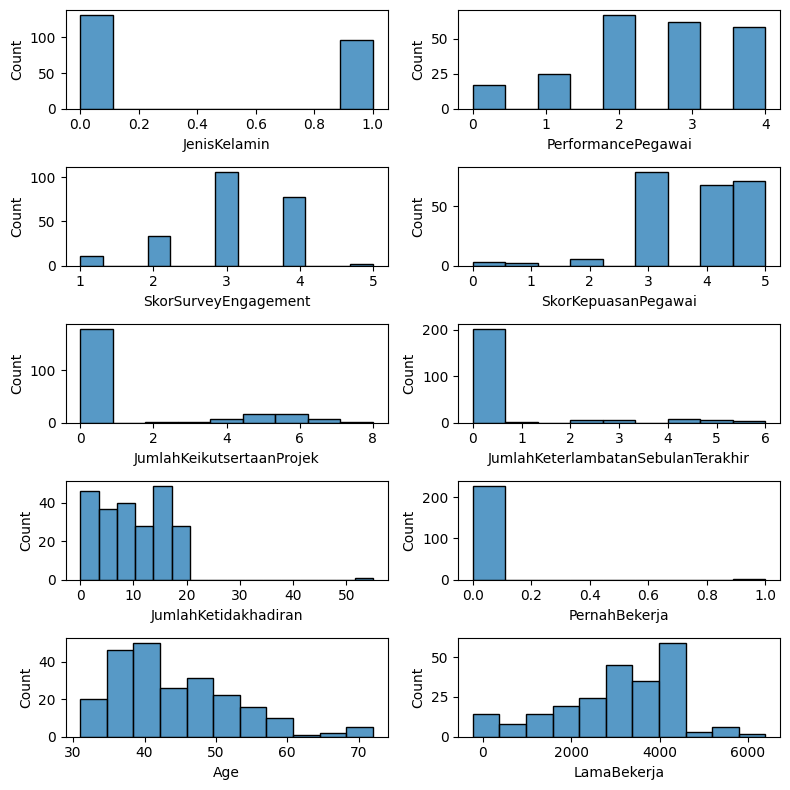

In [147]:
feat = X_train.select_dtypes(['int', 'float']).columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i in range(len(feat)):
    plt.subplot(5, 2, i+1)
    sns.histplot(x = X_train[feat[i]])
    plt.tight_layout()
fig.show()

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1463363123.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1463363123.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1463363123.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1463363123.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1463363123.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples o

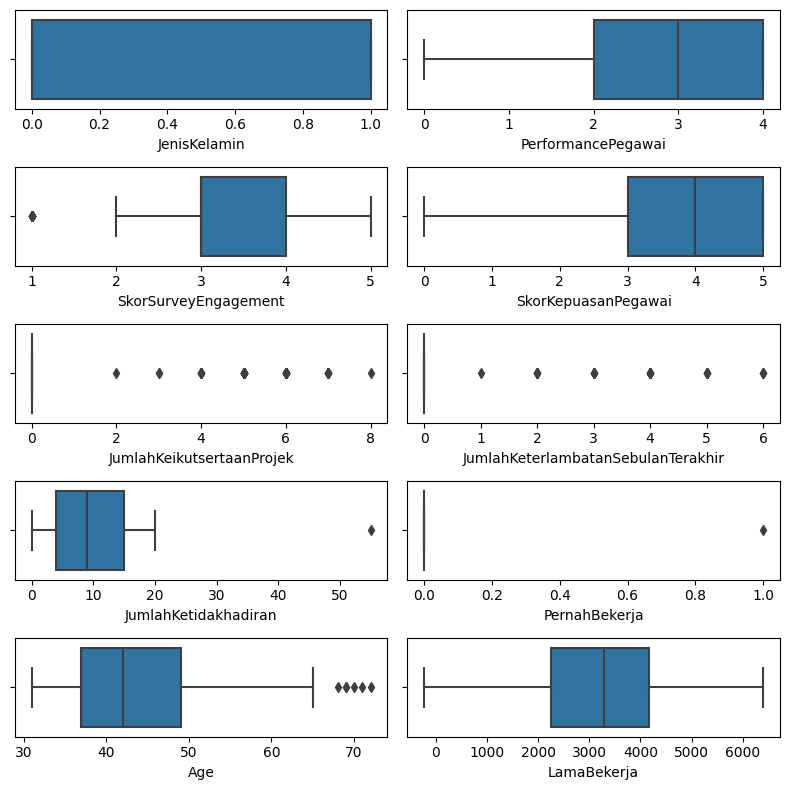

In [148]:
feat = X_train.select_dtypes(['int', 'float']).columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i in range(len(feat)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x = X_train[feat[i]])
    plt.tight_layout()
fig.show()

Terdapat outlier pada feature JumlahKetidakhadiran, kita akan melakukan outlier handling dengan mengeliminasi baris data yang mengandung outlier pada data train.

In [149]:
# Merge the Xtrain and Y train first
merge_train = pd.concat([X_train,y_train], axis = 1)
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 46 to 172
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenisKelamin                        229 non-null    int64  
 1   PerformancePegawai                  229 non-null    int64  
 2   SkorSurveyEngagement                229 non-null    int64  
 3   SkorKepuasanPegawai                 229 non-null    float64
 4   JumlahKeikutsertaanProjek           229 non-null    float64
 5   JumlahKeterlambatanSebulanTerakhir  229 non-null    float64
 6   JumlahKetidakhadiran                229 non-null    float64
 7   PernahBekerja                       229 non-null    int64  
 8   Age                                 229 non-null    int64  
 9   LamaBekerja                         229 non-null    int64  
 10  StatusPernikahan_Belum_menikah      229 non-null    uint8  
 11  StatusPernikahan_Lainnya            229 non-

In [150]:
print('Data train dimention before outlier Handling: ', len(merge_train))
for i in ['Age', 'JumlahKetidakhadiran']:
    Q1 = merge_train[i].quantile(0.25)
    Q3 = merge_train[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    merge_train = merge_train[(merge_train[i] > lower_bound) & (merge_train[i] < upper_bound)]
print('Data train dimention after Outlier Handling: ', len(merge_train))

Data train dimention before outlier Handling:  229
Data train dimention after Outlier Handling:  222


C:\Users\una\AppData\Local\Temp\ipykernel_1368\608211834.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\608211834.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\608211834.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\608211834.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\608211834.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be remov

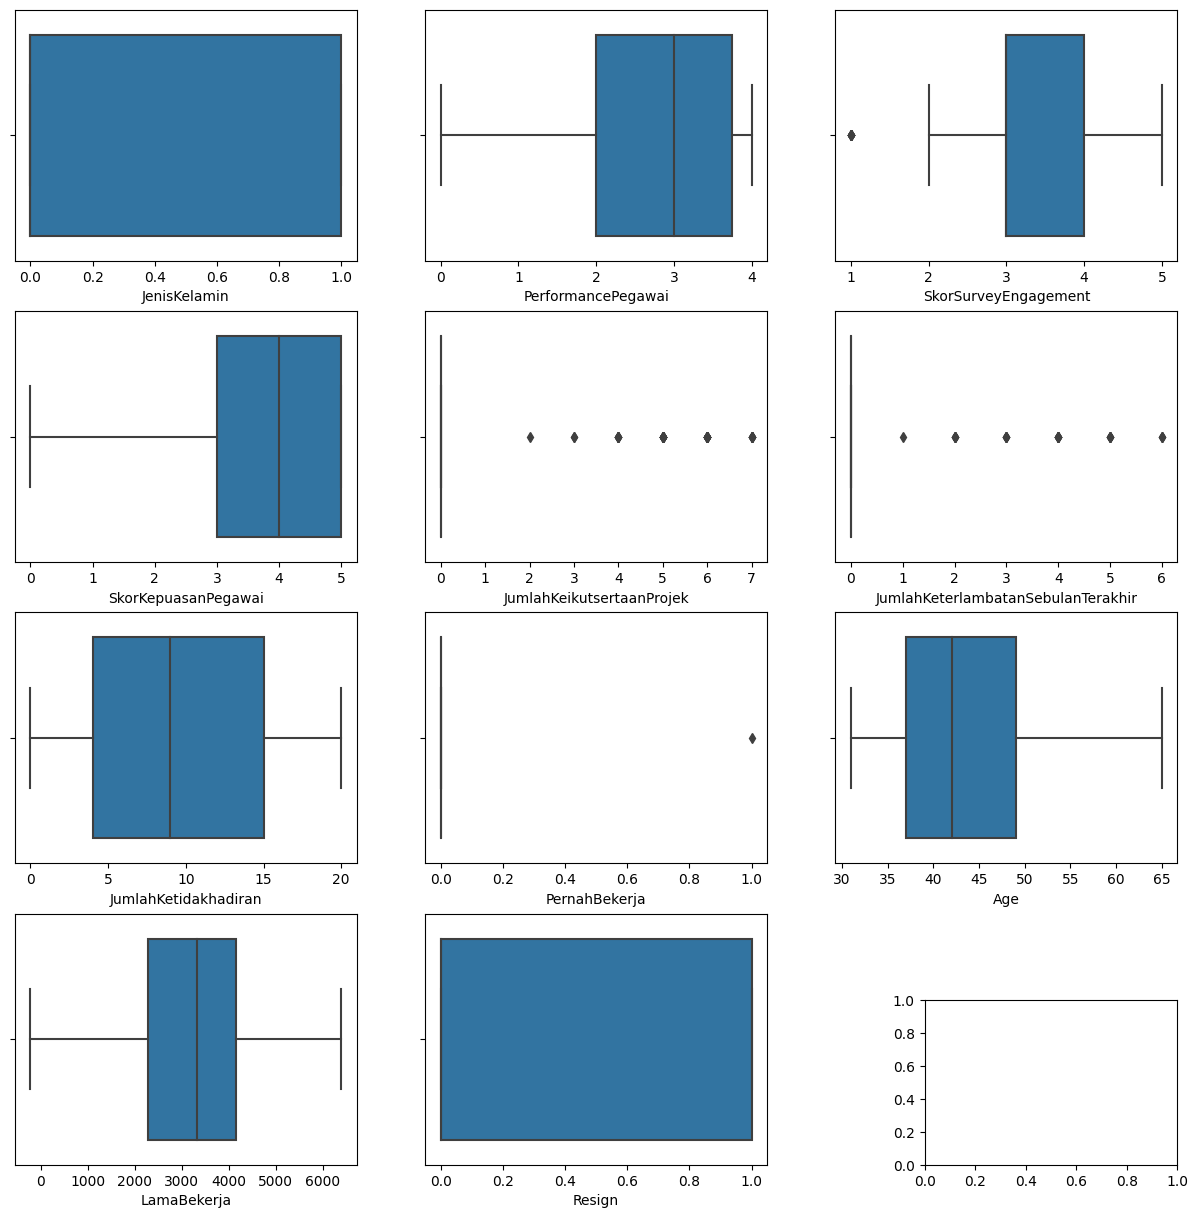

In [151]:
feat = merge_train.select_dtypes(['int', 'float']).columns
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15,15))
for i in range(len(feat)):
    plt.subplot(4,3, i+1)
    sns.boxplot (x = merge_train[feat[i]])
    plt.tight_layout()

In [152]:
# split the features and target of X_train
X_train = merge_train.drop('Resign',axis = 1)
y_train = merge_train['Resign']

**Feature Transformation**

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1047660715.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1047660715.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1047660715.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1047660715.py:6: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\1047660715.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be 

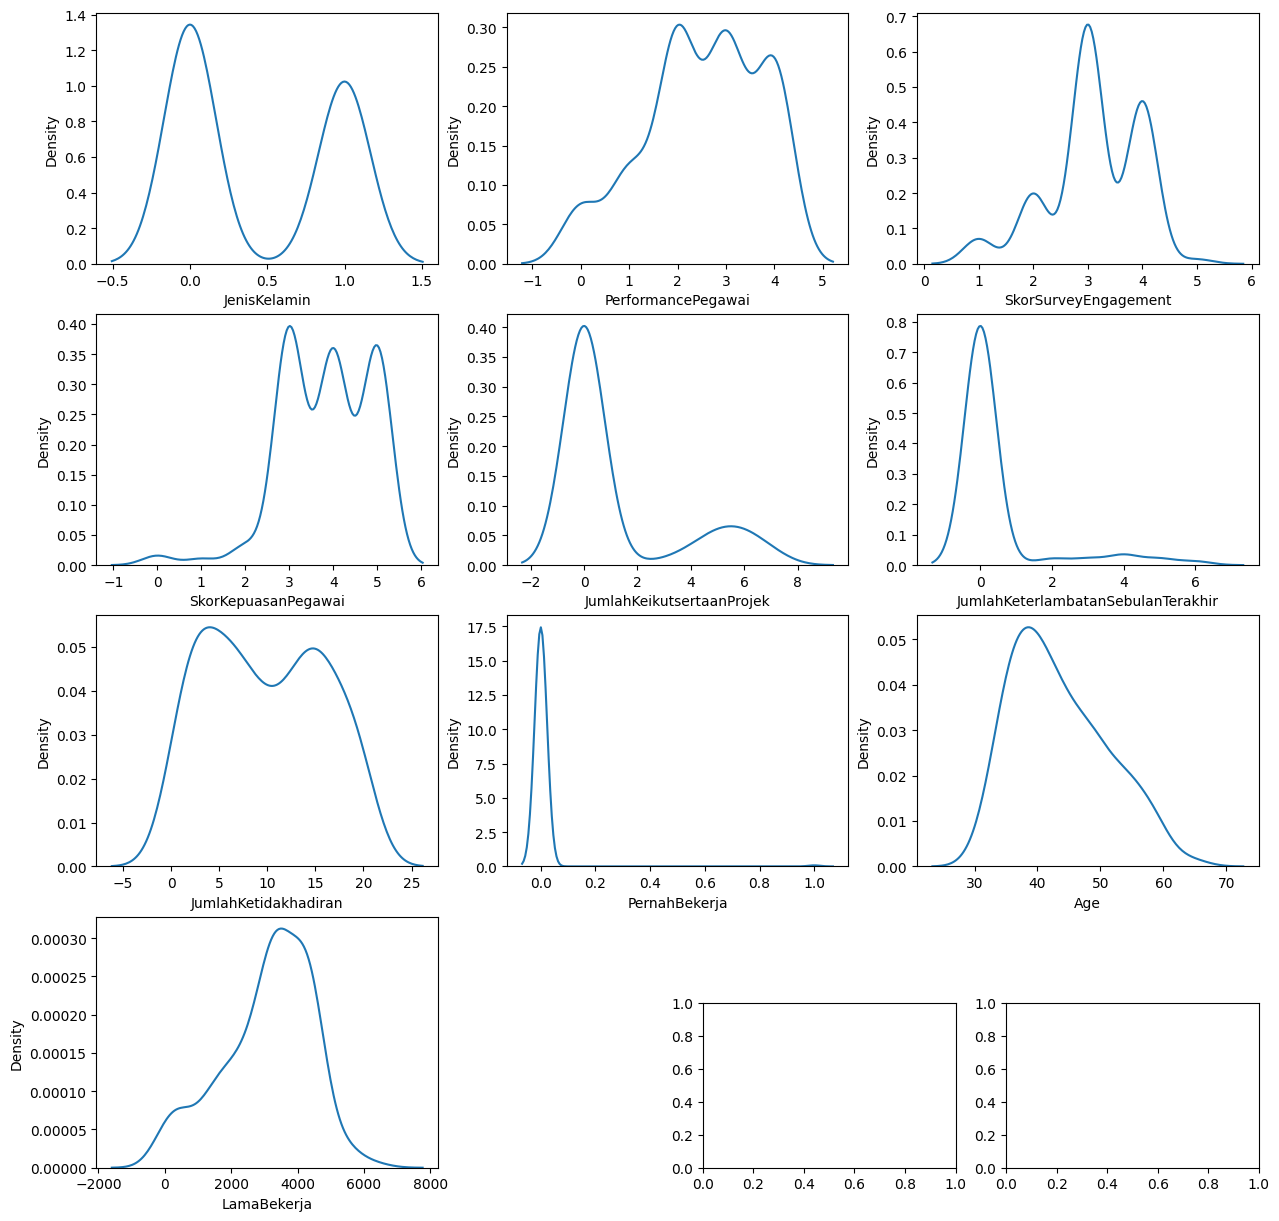

In [153]:
feat = X_train.select_dtypes(['int', 'float']).columns
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15,15))
for i in range(len(feat)):
    plt.subplot(4,3, i+1)
    sns.kdeplot (x = X_train[feat[i]])
    plt.tight_layout()

Kemudian akan dilakukan feature transformation untuk kolom 'PerformancePegawai', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Age', dan 'LamaBekerja' untuk menyeragamkan skala dengan feature lain. 

In [154]:
# Fix the skewness and distribution
minmaxfeat = ['PerformancePegawai', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Age', 'LamaBekerja']
minmaxscaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[minmaxfeat] = minmaxscaler.fit_transform(X_train_scaled[minmaxfeat])
X_test_scaled[minmaxfeat] = minmaxscaler.fit_transform(X_test_scaled[minmaxfeat])

In [155]:
display(X_train_scaled.head())
display(X_test_scaled.head())

,JenisKelamin,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,PernahBekerja,Age,LamaBekerja,...,Pekerjaan_SE,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level,TingkatPendidikan_Doktor,TingkatPendidikan_Magister,TingkatPendidikan_Sarjana
46,1,1.00,0.25,1.0,0.0,0.0,0.85,0,0.647059,0.337615,...,1,1,0,0,0,1,0,0,0,1
257,0,0.00,0.75,0.8,0.0,0.0,0.75,0,0.470588,0.586368,...,0,1,0,0,1,0,0,0,0,1
214,1,0.50,0.50,0.6,0.0,0.0,0.20,0,0.205882,0.061357,...,1,1,0,0,1,0,0,0,1,0
167,1,0.50,0.25,0.8,0.0,0.0,0.35,0,0.235294,0.421037,...,0,1,0,0,0,1,0,0,0,1
223,0,0.25,0.75,0.6,0.0,0.0,0.05,0,0.411765,0.642436,...,1,0,0,1,0,0,1,0,0,1


,JenisKelamin,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,PernahBekerja,Age,LamaBekerja,...,Pekerjaan_SE,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level,TingkatPendidikan_Doktor,TingkatPendidikan_Magister,TingkatPendidikan_Sarjana
55,0,0.50,0.666667,0.0,0.000000,0.0,0.20,0,0.473684,0.674093,...,1,1,0,0,1,0,0,0,0,1
181,1,0.75,1.000000,0.6,0.000000,0.0,0.26,0,0.342105,0.751537,...,1,0,0,1,1,0,0,0,1,0
92,0,0.50,1.000000,0.6,0.000000,0.0,0.34,0,0.973684,0.828980,...,1,0,0,1,1,0,0,0,0,1
207,0,1.00,1.000000,0.6,0.714286,0.0,0.34,0,0.447368,0.000000,...,1,1,0,0,0,1,0,0,0,1
188,0,0.75,0.666667,1.0,0.000000,0.0,0.14,0,0.605263,0.183620,...,1,1,0,0,1,0,0,1,0,0


**Imbalance Class Handling**

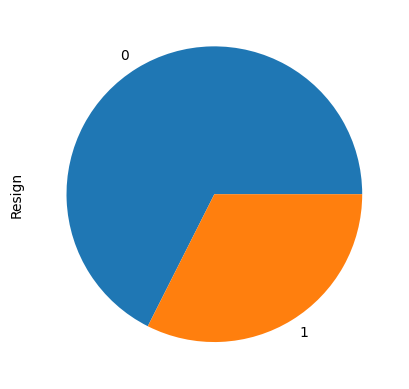

In [156]:
#Data Train's TARGET distribution
y_train.value_counts().plot(kind='pie')
plt.show()

Karena kelas pada data train tidak terlalu ekstrim, sehingga kita tidak melakukan imbalance class handling

### Data Modeling

In [157]:
# Define evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

def eval_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm)

    print("Confusion Matrix")
    display(cm)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

In [158]:
#Data modeling
#Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
eval_classification(lr)

Confusion Matrix


,0,1
0,44,0
1,9,5


Accuracy (Test Set): 0.84
Precision (Test Set): 1.00
Recall (Test Set): 0.36
F1-Score (Test Set): 0.53
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.94


In [161]:
#Data modeling
#Classification with Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
eval_classification(dt)

Confusion Matrix


,0,1
0,36,8
1,8,6


Accuracy (Test Set): 0.72
Precision (Test Set): 0.43
Recall (Test Set): 0.43
F1-Score (Test Set): 0.43
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.62


In [162]:
#Data modeling
#Classification with XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train_scaled, y_train)
eval_classification(xg)

Confusion Matrix


,0,1
0,44,0
1,9,5


Accuracy (Test Set): 0.84
Precision (Test Set): 1.00
Recall (Test Set): 0.36
F1-Score (Test Set): 0.53
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.79


In [164]:
#Data modeling
#Classification with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
eval_classification(rf)

Confusion Matrix


,0,1
0,44,0
1,9,5


Accuracy (Test Set): 0.84
Precision (Test Set): 1.00
Recall (Test Set): 0.36
F1-Score (Test Set): 0.53
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.77


Karena dari keempat model memiliki nilai recall yang rendah, maka akan dicoba untuk melakukan log transformation.

C:\Users\una\AppData\Local\Temp\ipykernel_1368\2485157580.py:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



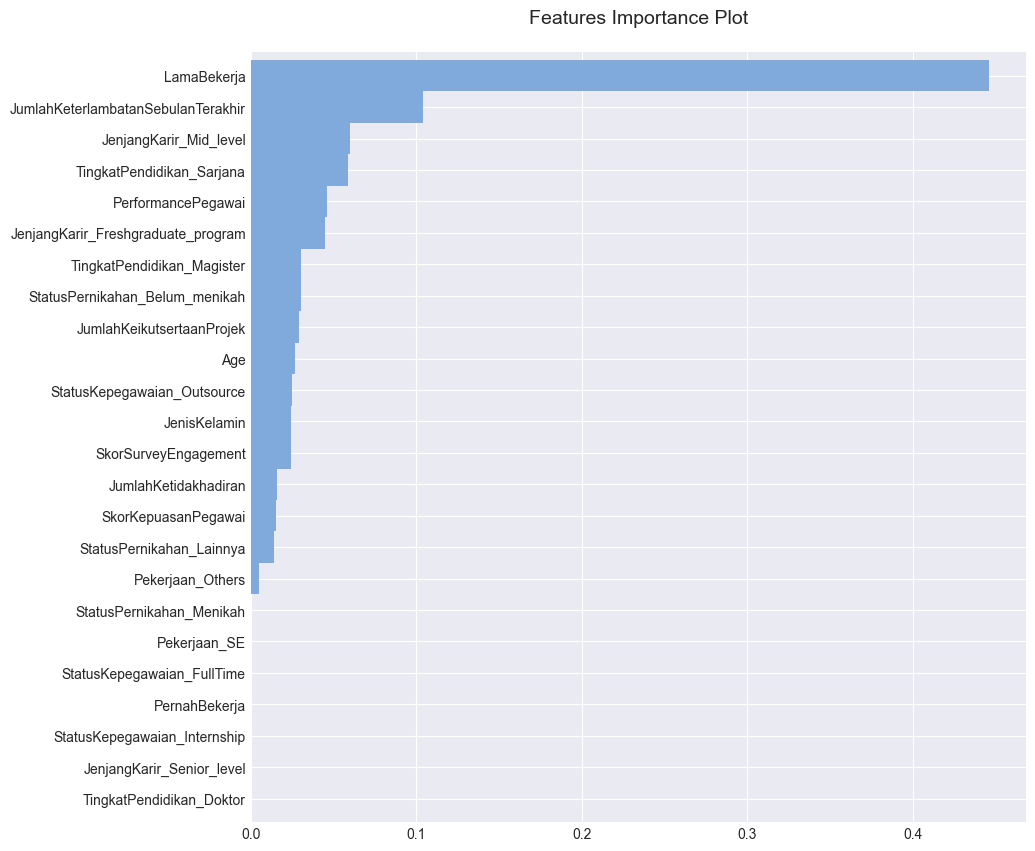

In [165]:
# important features
importances_rf = pd.Series(xg.feature_importances_, index=X_train.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color='#7faadb', width=1)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()